Questions

I feel really bad eliminating any observations from a data set this small for one thing. 

We have nice tools for eliminating outliers in the sklearn library as I recall but they are have but the way the script is set up I have to put them in the dictionary form. I mean none of my data is in the right format for using sklearn until I am at task number four so I have to do the outlier elimination in Pandas, right? 

I also have to eliminate missing values for the algorithms to work. I think for a variable like director's pay a missing value really just means they are not a director so I should replace them with zeros, but for most the missing values should be replaced with something closer to the average. Suggestions for dealing with missing values? In the course what they did was run some regressions and remove the 10% or so of observations that lead the to the highest residuals in the regression analysis, but I don't know how they do that with the data set's dependent variable being a True/False value.

Visualization ideas? 

I can't use the emails in the analysis so I drop them from the data set. Is that the correct procedure? Or can I just omit them from the features_list and count on sklearn ignoring them? Is the set of variables that sklearn uses determined by the columns that are actually in the data set or by the list of features that I give it in features_list? 

So with feature selection, how do I select features before I have run a model? Shouldn't I just put them all in? 

In [151]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

**Task 1: Select Features**

Load the dictionary containing the dataset

In [152]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

**Task 2: Eliminate Outliers**

In [153]:
data_dict['METTS MARK']['bonus']

600000

In [154]:
counter = 0
bonus_tot = 0
for keys in data_dict.keys():
    if type(data_dict[keys]['bonus'])!= str:
        bonus_tot += float(data_dict[keys]['bonus'])
        counter += 1
    #bonus_tot += float(data_dict[keys]['bonus'])

average = bonus_tot/counter
print average

2374234.60976


This is a lot of trouble to find a single summary value so I think it would be best to convert the data set into Pandas and do the initial analysis of outliers there. 

In [155]:
import pandas as pd
import numpy as np

In [156]:
df = pd.DataFrame(data_dict)
df.head()

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN


What's the number for 911? 

In [157]:
df = df.transpose()

In [158]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


First, there is no reason to have the emails in the data set since they are not something we can turn into numbers.

In [159]:
df = df.drop('email_address', axis=1)

Next, I am going to change the data set into all numerical values since that is the only kind of variable sklearn will take. 

In [160]:
df = df.astype(float)

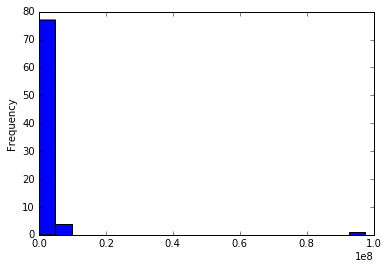

In [161]:
%matplotlib inline
df['bonus'].plot(kind='hist', bins=20)

Well, I seem to have at least one outlier. 

In [162]:
df['bonus'].max()

97343619.0

So if someone got a 97 million dollar bonus he has probably already attracted the attention of the investigators. Now, how to access the person that got the bonus, in a pandas-like way? 

In [163]:
df[df['bonus']==97343619.0]

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,311764000,5235198,NaN,NaN,NaN,83925000,48521928,42667589,0,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Ok, so we are getting the total mixed in with all the other values. That is the first one to eliminate. 

In [164]:
df[df.index=='TOTAL']

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,311764000,5235198,NaN,NaN,NaN,83925000,48521928,42667589,0,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Well, that is what would work. Now, how do we remove a row? That I will look up! 

Here is an example bit of code from stackoverflow: 
```
df.drop(df.index[[1,3]])
```
So index works for the string I used above so that combined with drop should work. 

In [165]:
len(df)

146

In [166]:
df = df.drop('TOTAL')

In [167]:
len(df)

145

Ok, so that seems to have worked. Lets test it out.

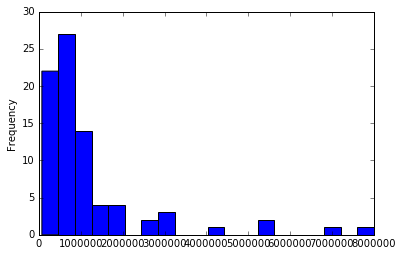

In [168]:
df_test['bonus'].plot(kind='hist', bins=20)

In [169]:
df_test['bonus'].max()

8000000.0

I think for these people the NaN values should be replaced by 0. The fact that we don't have anything for them on this variable is probably indicative of the fact that they did not have any email contact with a poi. On the other hand, there is a guy, Yeager F Scott, who is a poi but has a NaN value for both the to and from poi variables. 

Here is the model for using .fillna() that I found on S.O.
```
df[1].fillna(0, inplace=True)
```
I'll just do this with the string index used above. 

Now I have to get rid of the missing values to use this in sklearn. 

In [170]:
df.fillna(0, inplace=True)

In [171]:
len(df)

145

**Task 3: Create new feature(s)**

One thing that might work is deferred types of income and compensation. The people in the know might be aware that the gains they are making are based on risky assumptions and so might be less likely to take deferred compensation than people that are not so close to the fraud. Maybe there could be some sort of ratio of current to deferred compensation? 

I am going to call it the deferred_ratio. deferred_income should be correlated with being a poi and they should be normalized by measures of current compensation for which purpose I will use total_payments. Total payments does not seem to have any zeros in it so that will be good. I will divide the absolute value of deferred payments by the total payments. Those who are deferring less of their payments and maximizing current income are more likely to be poi is my assumption. 

First I check to see that we have no 0's in the total payments variable.

In [172]:
df['total_payments'].describe()

count    1.450000e+02
mean     2.243477e+06
std      8.817819e+06
min      0.000000e+00
25%      9.109300e+04
50%      9.161970e+05
75%      1.934359e+06
max      1.035598e+08
Name: total_payments, dtype: float64

In [176]:
df['deferred_ratio'] = df['deferred_income']/(df['total_payments'] + 1)

In [177]:
df['deferred_ratio'].describe()

count      145.000000
mean      -807.965815
std       8320.976543
min     -98784.000000
25%         -0.094786
50%          0.000000
75%          0.000000
max          0.000000
Name: deferred_ratio, dtype: float64

We have to get the features list and put 'poi' at the front of the list. 

In [178]:
features_list = list(df.columns)

In [179]:
features_list

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'deferred_ratio']

In [180]:
features_list.index('poi')

12

In [181]:
features_list.remove('poi')

In [182]:
features_list

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'deferred_ratio']

In [183]:
features_list.insert(0, 'poi')

In [184]:
features_list

['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'deferred_ratio']

Now we have to put the thing back into the dictionary form that we found the data in. There are two steps: 

* transpose the dataset
* do to_dict()

In [185]:
df = df.transpose()

In [186]:
data_dict = df.to_dict()

In [187]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000.0,
  'deferral_payments': 2869717.0,
  'deferred_income': -3081055.0,
  'deferred_ratio': -0.6870541112909675,
  'director_fees': 0.0,
  'exercised_stock_options': 1729541.0,
  'expenses': 13868.0,
  'from_messages': 2195.0,
  'from_poi_to_this_person': 47.0,
  'from_this_person_to_poi': 65.0,
  'loan_advances': 0.0,
  'long_term_incentive': 304805.0,
  'other': 152.0,
  'poi': 0.0,
  'restricted_stock': 126027.0,
  'restricted_stock_deferred': -126027.0,
  'salary': 201955.0,
  'shared_receipt_with_poi': 1407.0,
  'to_messages': 2902.0,
  'total_payments': 4484442.0,
  'total_stock_value': 1729541.0},
 'BADUM JAMES P': {'bonus': 0.0,
  'deferral_payments': 178980.0,
  'deferred_income': 0.0,
  'deferred_ratio': 0.0,
  'director_fees': 0.0,
  'exercised_stock_options': 257817.0,
  'expenses': 3486.0,
  'from_messages': 0.0,
  'from_poi_to_this_person': 0.0,
  'from_this_person_to_poi': 0.0,
  'loan_advances': 0.0,
  'long_term_incentive': 0.0,
  'o

In [188]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# figure out how this code works


In [189]:
my_dataset.keys

<function keys>

So the data_dict has be made from the pandas dictionary that I am making now. 

I could convert the pandas data sets into features and labels directly with the following code but the problem seems to ask us to convert the whole thing into a data_dict(ionary) and let the Udacity script do it for me. 
```
labels = train_df["Survived"].values
features = train_df[list(columns)].values
```
So I still have to find a function that will do the whole thing at once and go from a Pandas DataFrame to a dictionary of dictionaries like we have in the project set up. 

Now for some reason the computer knows that what the labels are. I think that is because the features list has 'poi' as the first variable even though the data stored in the data set has 'poi' somewhere in the middle of the data set. Also, looking at the features list it seems there is no reason to bother with getting rid of variables from the actual data set. You can just omit the things from features list. 

In [190]:
labels[0:3]

[0.0, 0.0, 0.0]

**Task 4: Try a varity of classifiers**
Please name your classifier *clf* for easy export below.
Note that if you want to do PCA or other multi-stage operations,
you'll need to use Pipelines. For more info: [pipeline](http://scikit-learn.org/stable/modules/pipeline.html)

The first one is provided by the courseware to provide a starting point, but we should try others. 

In [191]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

**Task 5: Tune to >= 0.3 precision and recall** 

Use the course testing script. Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation. For more info: [cross_validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html)

The next cell is an example starting point. Try investigating other evaluation techniques!

In [192]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [193]:
from tester import test_classifier

Here is the documentation on the test classifier: 
```
test_classifier(clf, dataset, feature_list, folds = 1000)
```

In [194]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

GaussianNB()
	Accuracy: 0.61700	Precision: 0.21538	Recall: 0.70850	F1: 0.33034	F2: 0.48597
	Total predictions: 15000	True positives: 1417	False positives: 5162	False negatives:  583	True negatives: 7838



Ok, so I have the script working. It is well below the parameters we want but at least we know how to work these scripts!

**Model Two**

I thought about trying to adjust the parameters of the GaussianNB, but there don't seem to be any to adjust. That is the point of the Naive Bayes, it is naive. The only ways to improve the model is by changing the features that go into the model. 

[Here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) is the documentation for the Gaussian Naive Bayes model. 

**Model Three**

The [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) takes a bunch of weak classifiers that each, on their own, add little to our ability to estimate the outcome, and takes a majority vote on which is best. 

In [195]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

In [196]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)
	Accuracy: 0.85213	Precision: 0.42044	Recall: 0.28800	F1: 0.34184	F2: 0.30736
	Total predictions: 15000	True positives:  576	False positives:  794	False negatives: 1424	True negatives: 12206



Ok, the Percision is there but the Recall is not. Can't find any way in the documentation to improve the estimator other than to get better features. Will think about it. 

**Model Four: DecisionTreeClassifier**

[Here](from sklearn.tree import DecisionTreeClassifier) are some classifiers that fall under ensemble methods. I'll try the DecisionTreeClassifier.

In [197]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1, random_state=0)

In [198]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.79713	Precision: 0.22993	Recall: 0.22200	F1: 0.22590	F2: 0.22354
	Total predictions: 15000	True positives:  444	False positives: 1487	False negatives: 1556	True negatives: 11513



**Model 5: RandomForestClassifier**

In [200]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)

In [201]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
	Accuracy: 0.85213	Precision: 0.34473	Recall: 0.12100	F1: 0.17913	F2: 0.13905
	Total predictions: 15000	True positives:  242	False positives:  460	False negatives: 1758	True negatives: 12540



Better on Percision but even worse on Recall.

**Model 6: ExtraTreesClassifier**

In [202]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)

In [203]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=1,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
	Accuracy: 0.85180	Precision: 0.33723	Recall: 0.11550	F1: 0.17207	F2: 0.13299
	Total predictions: 15000	True positives:  231	False positives:  454	False negatives: 1769	True negatives: 12546



Percision acceptable but Recall really down. 

**Model 7.1: KNearestNeighbors**

In [204]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [205]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
	Accuracy: 0.87940	Precision: 0.61661	Recall: 0.25250	F1: 0.35828	F2: 0.28631
	Total predictions: 15000	True positives:  505	False positives:  314	False negatives: 1495	True negatives: 12686



Wow! KNearestNeighbors kicks ass! So, I have a model that I can turn in for the assignment. 

**Model 7.2: KNN with inverse distance weighting**

Just the model above with a parameter that gives points that are closer more influence in the voting. This seems plausible as we are looking for a relatively sparse dependent variable that is concentrated among the highest earners in the dataset. 

In [206]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [207]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')
	Accuracy: 0.86700	Precision: 0.50249	Recall: 0.25250	F1: 0.33611	F2: 0.28040
	Total predictions: 15000	True positives:  505	False positives:  500	False negatives: 1495	True negatives: 12500



Ok, this model has a slight drop in Percision and no change in Recall so that is bad.  

**Model 7.3: KNN with 5 neighbors**

In [208]:
clf = KNeighborsClassifier(n_neighbors=5)

In [209]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
	Accuracy: 0.87987	Precision: 0.65278	Recall: 0.21150	F1: 0.31949	F2: 0.24457
	Total predictions: 15000	True positives:  423	False positives:  225	False negatives: 1577	True negatives: 12775



Percision increases but recall goes down substantially. This makes sense. If you expand the number of neighbors you are looking at in an environment where the positives are fairly rare you are bringing in more 'negative' voters. You get fewer false positives but more false negatives. 

Unfortunately you can't reduce the number of neighbors you are looking at below 3--or can you? Two doesn't work since they would be tied, but if you were just going to be whatever the guy next to you is it seems to be opposite, you would be getting false positives all over the place? 

**Model 8: Support Vector Classifier**

This is actually the model that would be recommended by 'the' cheat sheet for Machine Learning. We have labeled data with less that 100k cases. I have actually jumped ahead of the cheat sheet. The Naive Bayes classifier is for less than 100k and text data. 

The SVC classifier is actually recommende as the first choice, then if that is not working we should use the KNeighbors classifier, which I have already tried and found wanting. But, if this doesn't work, there is one more on the cheat sheet, the SVC Ensemble Classifier. 

The KNeighbors classifier was a huge improvement in Percision but a slight loss in Recall. So, assuming this does not work, the Ensemble Classifier may find a way to combine the best of both words. 

In [210]:
from sklearn import svm
clf = svm.SVC()

In [211]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


I am not sure what these erros mean or how there could be division by zero problems on this model and not on the others, but I will move on to the ensemble classifiers just to see if that works. 

**Model 9: Bagging Ensemble Classifiers**

I have not found the SVC Ensemble Classifier so I will keep looking and, for the time being, use the thing that appears to be closest to it that I have been able to find: The Bagging Ensemble. It uses a KNN and then passes the result (?) to a Bagging classifier. 

In [212]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [213]:
test_classifier(clf, my_dataset, features_list, folds = 1000)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
	Accuracy: 0.86680	Precision: 0.58333	Recall: 0.00350	F1: 0.00696	F2: 0.00437
	Total predictions: 15000	True positives:    7	False positives:    5	False negatives: 1993	True negatives: 12995



Decent Percision but a terrible drop in Recall

**Task 6: Dump**
    
Dump the classifier, dataset, and features_list so anyone can check your results. 

You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [12]:
dump_classifier_and_data(clf, my_dataset, features_list)